# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 1, 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting loss score along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
4. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
5. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [19]:
!pip3 install tensorflow keras

In [23]:
# part 1
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
import tensorflow as tf

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)
tf.random.set_seed(7)


import matplotlib.pyplot as plt
%matplotlib inline

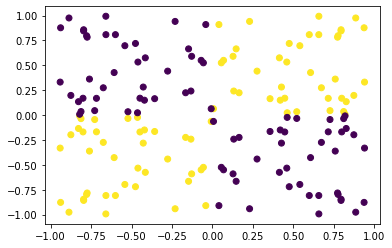

In [25]:

n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)
plt.scatter(*zip(*X), c=y)

In [ ]:

num_layers = [1, 2, 3, 4, 5]  # different layers
scores_2 = []  # 2 nuerons
for num_layer in num_layers:
    
    # build model and evaluate
    model = Sequential()
    model.add(Dense(2, input_dim=2, activation="tanh"))
    for _ in range(num_layer-1):
        model.add(Dense(2, activation="tanh"))
    model.add(Dense(1, activation="sigmoid"))

    sgd = SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

    model.fit(X, y, batch_size=2, epochs=400)
    score = model.evaluate(X, y)
    scores_2.append(score[1])  # save accuracy
plt.plot(num_layers, scores_2)
plt.show()

In [29]:
scores_2 # layer_num = 5

[0.699999988079071,
 0.793749988079071,
 0.981249988079071,
 0.7250000238418579,
 0.9375]

In [ ]:
num_layers = [1, 2, 3, 4, 5]  # different layers
scores_3 = []  # nueron_num = 3
for num_layer in num_layers:
    
    # build model and evaluate
    model = Sequential()
    model.add(Dense(3, input_dim=2, activation="tanh"))
    for _ in range(num_layer - 1):
        model.add(Dense(3, activation="tanh"))
    model.add(Dense(1, activation="sigmoid"))

    sgd = SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

    model.fit(X, y, batch_size=2, epochs=400)
    score = model.evaluate(X, y)
    scores_3.append(score[1])  # save accuracy

print(scores_3)
plt.plot(num_layers, scores_3)
plt.show()

Epoch 1/400
80/80 [==============================] - 2s 4ms/step - loss: 0.7038 - accuracy: 0.4688
Epoch 2/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 3/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.5437
Epoch 4/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5375
Epoch 5/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.6125
Epoch 6/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.6000
Epoch 7/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6354 - accuracy: 0.5938
Epoch 8/400
80/80 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.6125
Epoch 9/400
80/80 [==============================] - 0s 4ms/step - loss: 0.5925 - accuracy: 0.6500
Epoch 10/400
80/80 [==============================] - 0s 4ms/step - loss: 0.5679 - accuracy: 0.6875
Epoch 11/

80/80 [==============================] - 0s 5ms/step - loss: 0.2505 - accuracy: 0.8813
Epoch 84/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2361 - accuracy: 0.8875
Epoch 85/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2460 - accuracy: 0.8813
Epoch 86/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2396 - accuracy: 0.9000
Epoch 87/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2401 - accuracy: 0.8750
Epoch 88/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.9062
Epoch 89/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2422 - accuracy: 0.9125
Epoch 90/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2327 - accuracy: 0.8938
Epoch 91/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.8687
Epoch 92/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2483 - accuracy: 0.8813
Epoch 93/400


80/80 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.8687
Epoch 165/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2284 - accuracy: 0.9000
Epoch 166/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.8938
Epoch 167/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2286 - accuracy: 0.9125
Epoch 168/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2131 - accuracy: 0.9312
Epoch 169/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2297 - accuracy: 0.8938
Epoch 170/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2323 - accuracy: 0.8938
Epoch 171/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.9000
Epoch 172/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2278 - accuracy: 0.8813
Epoch 173/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2418 - accuracy: 0.8750
Epoc

80/80 [==============================] - 0s 4ms/step - loss: 0.2225 - accuracy: 0.8938
Epoch 246/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2269 - accuracy: 0.8875
Epoch 247/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2267 - accuracy: 0.8938
Epoch 248/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.9250
Epoch 249/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2252 - accuracy: 0.9250
Epoch 250/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.8813
Epoch 251/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2157 - accuracy: 0.8938
Epoch 252/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2439 - accuracy: 0.8875
Epoch 253/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2234 - accuracy: 0.9125
Epoch 254/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2154 - accuracy: 0.9062
Epoc

80/80 [==============================] - 0s 4ms/step - loss: 0.2318 - accuracy: 0.8813
Epoch 327/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2319 - accuracy: 0.9062
Epoch 328/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.9062
Epoch 329/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2443 - accuracy: 0.8875
Epoch 330/400
80/80 [==============================] - 0s 5ms/step - loss: 0.2236 - accuracy: 0.8750
Epoch 331/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2244 - accuracy: 0.8938
Epoch 332/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2446 - accuracy: 0.8687
Epoch 333/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2299 - accuracy: 0.9000
Epoch 334/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2136 - accuracy: 0.9062
Epoch 335/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.9000
Epoc

80/80 [==============================] - 0s 5ms/step - loss: 0.5353 - accuracy: 0.7812
Epoch 7/400
80/80 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.8188
Epoch 8/400
80/80 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.8625
Epoch 9/400
80/80 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8125
Epoch 10/400
80/80 [==============================] - 0s 4ms/step - loss: 0.3469 - accuracy: 0.8625
Epoch 11/400
80/80 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.8375
Epoch 12/400
80/80 [==============================] - 0s 4ms/step - loss: 0.3202 - accuracy: 0.8687
Epoch 13/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.8875
Epoch 14/400
80/80 [==============================] - 0s 4ms/step - loss: 0.3013 - accuracy: 0.8562
Epoch 15/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy: 0.8875
Epoch 16/400
80/

80/80 [==============================] - 0s 4ms/step - loss: 0.2521 - accuracy: 0.8875
Epoch 89/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2381 - accuracy: 0.9187
Epoch 90/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2285 - accuracy: 0.9000
Epoch 91/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 0.8813
Epoch 92/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2518 - accuracy: 0.9062
Epoch 93/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2318 - accuracy: 0.9000
Epoch 94/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.9000
Epoch 95/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2437 - accuracy: 0.9000
Epoch 96/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2671 - accuracy: 0.8813
Epoch 97/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2368 - accuracy: 0.8938
Epoch 98/400


80/80 [==============================] - 0s 5ms/step - loss: 0.2163 - accuracy: 0.9187
Epoch 170/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2179 - accuracy: 0.9187
Epoch 171/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2132 - accuracy: 0.8938
Epoch 172/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2135 - accuracy: 0.8938
Epoch 173/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2598 - accuracy: 0.8875
Epoch 174/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.9187
Epoch 175/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2046 - accuracy: 0.9250
Epoch 176/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2349 - accuracy: 0.9062
Epoch 177/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.8938
Epoch 178/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2187 - accuracy: 0.9125
Epoc

80/80 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.8687
Epoch 251/400
80/80 [==============================] - 0s 4ms/step - loss: 0.1915 - accuracy: 0.9250
Epoch 252/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2337 - accuracy: 0.8938
Epoch 253/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2288 - accuracy: 0.9062
Epoch 254/400
80/80 [==============================] - 0s 4ms/step - loss: 0.1745 - accuracy: 0.9312
Epoch 255/400
80/80 [==============================] - 0s 4ms/step - loss: 0.1957 - accuracy: 0.9125
Epoch 256/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2365 - accuracy: 0.9000
Epoch 257/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2253 - accuracy: 0.9062
Epoch 258/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2249 - accuracy: 0.9000
Epoch 259/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2168 - accuracy: 0.9000
Epoc

80/80 [==============================] - 0s 4ms/step - loss: 0.2309 - accuracy: 0.9000
Epoch 332/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.8875
Epoch 333/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2607 - accuracy: 0.9062
Epoch 334/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2156 - accuracy: 0.9000
Epoch 335/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.8938
Epoch 336/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2274 - accuracy: 0.9125
Epoch 337/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2614 - accuracy: 0.8813
Epoch 338/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2225 - accuracy: 0.9250
Epoch 339/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2144 - accuracy: 0.9187
Epoch 340/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2179 - accuracy: 0.9250
Epoc

80/80 [==============================] - 0s 4ms/step - loss: 0.3037 - accuracy: 0.8938
Epoch 12/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2957 - accuracy: 0.8938
Epoch 13/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2703 - accuracy: 0.9125
Epoch 14/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2638 - accuracy: 0.8938
Epoch 15/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2714 - accuracy: 0.8813
Epoch 16/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2583 - accuracy: 0.8875
Epoch 17/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2467 - accuracy: 0.8938
Epoch 18/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2128 - accuracy: 0.8938
Epoch 19/400
80/80 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.9187
Epoch 20/400
80/80 [==============================] - 0s 4ms/step - loss: 0.2545 - accuracy: 0.8813
Epoch 21/400


Epoch 1/400


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


80/80 [==============================] - 0s 996us/step - loss: 0.7334 - accuracy: 0.4750
Epoch 2/400
80/80 [==============================] - 0s 1ms/step - loss: 0.7085 - accuracy: 0.4750
Epoch 3/400
80/80 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.4812
Epoch 4/400
80/80 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.4437
Epoch 5/400
80/80 [==============================] - 0s 1ms/step - loss: 0.7003 - accuracy: 0.4812
Epoch 6/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.4750
Epoch 7/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.5437
Epoch 8/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5312
Epoch 9/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5625
Epoch 10/400
80/80 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5750
Epoch 11/400
80/80 

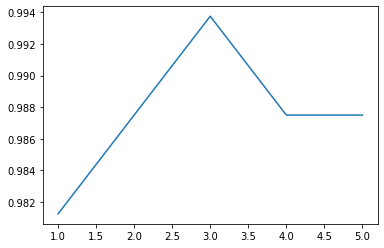

In [6]:
num_layers = [1, 2, 3, 4, 5]  # different layers
scores_4 = []  # nueron_num = 4
for num_layer in num_layers:
    
    # build model and evaluate
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation="tanh"))
    for _ in range(num_layer - 1):
        model.add(Dense(4, activation="tanh"))
    model.add(Dense(1, activation="sigmoid"))

    sgd = SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

    model.fit(X, y, batch_size=2, epochs=400)
    score = model.evaluate(X, y)
    scores_4.append(score[1])  # save accuracy

print(scores_4)
plt.plot(num_layers, scores_4)
plt.show()

In [ ]:
plt.figure()
plt.plot(num_layers, scores_2, "r", label="nueron_num: 2")
plt.plot(num_layers, scores_3, "g", label="nueron_num: 3")
plt.plot(num_layers, scores_4, "b", label="nueron_num: 4")
plt.legend()
plt.show()

## the most optimal configuraion
* 3 hidden layers, 4 nuerons per layer
* 2 or 4 hidden layers, 3 nuerons per layer

In [ ]:
# different activations tanh, sigmoid,softplus and relu 
# 3 hidden layers, 4 nuerons per layer
activations = ['tanh', 'sigmoid', 'softplus', 'relu']
scores = []
for activation in activations:
    
    # build model and evaluate
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation=activation))  # 3 hidden layer
    model.add(Dense(4, activation=activation))
    model.add(Dense(4, activation=activation))
    model.add(Dense(1, activation="sigmoid"))  # output layer

    sgd = SGD(lr=0.1)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

    model.fit(X, y, batch_size=2, epochs=400)
    score = model.evaluate(X, y)
    scores.append(score[1])  # save accuracy

print(scores)


In [ ]:
scores

In [ ]:
plt.bar(np.array(activations), np.array(scores))
plt.show()  # tanh or softplus are better

In [ ]:
# different optimizer SGD, Adam, RMSprop and Adadelta
# 3 hidden layers, 4 nuerons per layer, activation = tanh
from keras.optimizers import SGD, RMSprop, Adam, Adadelta
optimizers = [SGD(lr=0.1), RMSprop(lr=0.1), Adam(lr=0.1), Adadelta(lr=0.1)]
scores = []
for optimizer in optimizers:
    
    # build model and evaluate
    model = Sequential()
    model.add(Dense(4, input_dim=2, activation='tanh'))  # 3 hidden layer
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(1, activation="sigmoid"))  # output layer

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.fit(X, y, batch_size=2, epochs=400)
    score = model.evaluate(X, y)
    scores.append(score[1])  # save accuracy

print(scores)

In [ ]:
plt.bar(['SGD', 'RMSprop', 'Adam', 'Adadelta'], scores)
plt.show()  # SGD and RMSprop are better

## part 1: final setup
* layer_num: 3
* nuerons_per_layer: 4
* activation: tanh
* optimizer: SGD

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [ ]:
# part 2
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
X,y

In [ ]:
X.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(4,), activation='relu', use_bias=True))
model.add(Dense(6, activation='relu', use_bias=True))
model.add(Dense(3, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.01), metrics="accuracy")
model.fit(X_train, y_train, batch_size=5, epochs=100)

score = model.evaluate(X_test, y_test)
score

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(4,), activation='relu', use_bias=True))
model.add(Dense(6, activation='relu', use_bias=True))
model.add(Dense(3, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(lr=0.01), metrics="accuracy")  # optimizer = SGD, worse result
model.fit(X_train, y_train, batch_size=5, epochs=100)

score = model.evaluate(X_test, y_test)
score, model.metrics_names

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(4,), activation='relu', use_bias=True))
model.add(Dense(6, activation='relu', use_bias=True))
model.add(Dense(3, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics="accuracy")  # smaller learning rate， better result
model.fit(X_train, y_train, batch_size=5, epochs=100)

score = model.evaluate(X_test, y_test)
score

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(4,), activation='tanh', use_bias=True)) # activation = tanh, same result with relu
# model.add(Dense(8, activation='tanh', use_bias=True))
model.add(Dense(6, activation='tanh', use_bias=True))
model.add(Dense(3, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics="accuracy")  # smaller learning rate， better result
model.fit(X_train, y_train, batch_size=5, epochs=100)

score = model.evaluate(X_test, y_test)
score, model.metrics_names

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(4,), activation='relu', use_bias=True)) # activation = tanh, same result with relu
model.add(Dense(8, activation='relu', use_bias=True))  # more layers, same result with three layers'
model.add(Dense(6, activation='relu', use_bias=True))
model.add(Dense(3, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics="accuracy")  # smaller learning rate， better result
model.fit(X_train, y_train, batch_size=5, epochs=100)

score = model.evaluate(X_test, y_test)
score, model.metrics_names

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(4,), activation='relu', use_bias=True))
model.add(Dense(6, activation='relu', use_bias=True))
model.add(Dense(3, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics="accuracy")  # smaller learning rate， better result
model.fit(X_train, y_train, batch_size=5, epochs=200)  # more epochs, get same result

score = model.evaluate(X_test, y_test)
score, model.metrics_names

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(4,), activation='relu', use_bias=True))
model.add(Dense(6, activation='relu', use_bias=True))
model.add(Dense(3, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics="accuracy")  # smaller learning rate， better result
model.fit(X_train, y_train, batch_size=10, epochs=100)  # larger batch_size, worse result, when batch_size=2, same result

score = model.evaluate(X_test, y_test)
score

## optimal setup
* layer_num: 3
* activation: relu or tanh.  softmax for classify
* learning_rate: 0.001
* optimizer: Adam
* batch_size: 5
* epoch: 100